In [84]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import rand
sns.set()

In [2]:
data = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')
data.set_index('id', inplace=True)

In [3]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
print('Размеры выборки: {}'.format(data.shape))

Размеры выборки: (5110, 11)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


## Data parametres

In [10]:
data.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [28]:
def feature_type(n_unique):
    if(n_unique==0): return 'null'
    elif(n_unique==1): return 'unary'
    elif(n_unique==2): return 'binary'
    elif(n_unique<=8): return 'categorial'
    else: return 'interval'

In [56]:
params_dict = [{'feature_name': x,
              'null_abs' : len(data[data[x].isnull()]),
               'null_percentage' : 100*round(len(data[data[x].isnull()])/len(data), 4),
                'n_unique' : data[x].nunique(),
                'feature_type' : feature_type(data[x].nunique())
               }
              for x in data.columns]

In [57]:
df_stat = pd.DataFrame.from_dict(params_dict)
df_stat

,feature_name,null_abs,null_percentage,n_unique,feature_type
0,gender,0,0.00,3,categorial
1,age,0,0.00,104,interval
2,hypertension,0,0.00,2,binary
3,heart_disease,0,0.00,2,binary
4,ever_married,0,0.00,2,binary
5,work_type,0,0.00,5,categorial
6,Residence_type,0,0.00,2,binary
7,avg_glucose_level,0,0.00,3979,interval
8,bmi,201,3.93,418,interval
9,smoking_status,0,0.00,4,categorial


In [58]:
binary_cols = df_stat['feature_name'][df_stat.feature_type=='binary'].values
unary_cols = df_stat['feature_name'][df_stat.feature_type=='unary'].values
categorial_cols = df_stat['feature_name'][df_stat.feature_type=='categorial'].values
interval_cols = df_stat['feature_name'][df_stat.feature_type=='interval'].values

In [71]:
#пример вывода статистик по фичам определенного типа
df_stat[df_stat.feature_name.isin(interval_cols)]

,feature_name,null_abs,null_percentage,n_unique,feature_type
1,age,0,0.00,104,interval
7,avg_glucose_level,0,0.00,3979,interval
8,bmi,201,3.93,418,interval


## Working with interval features

#### boxplot

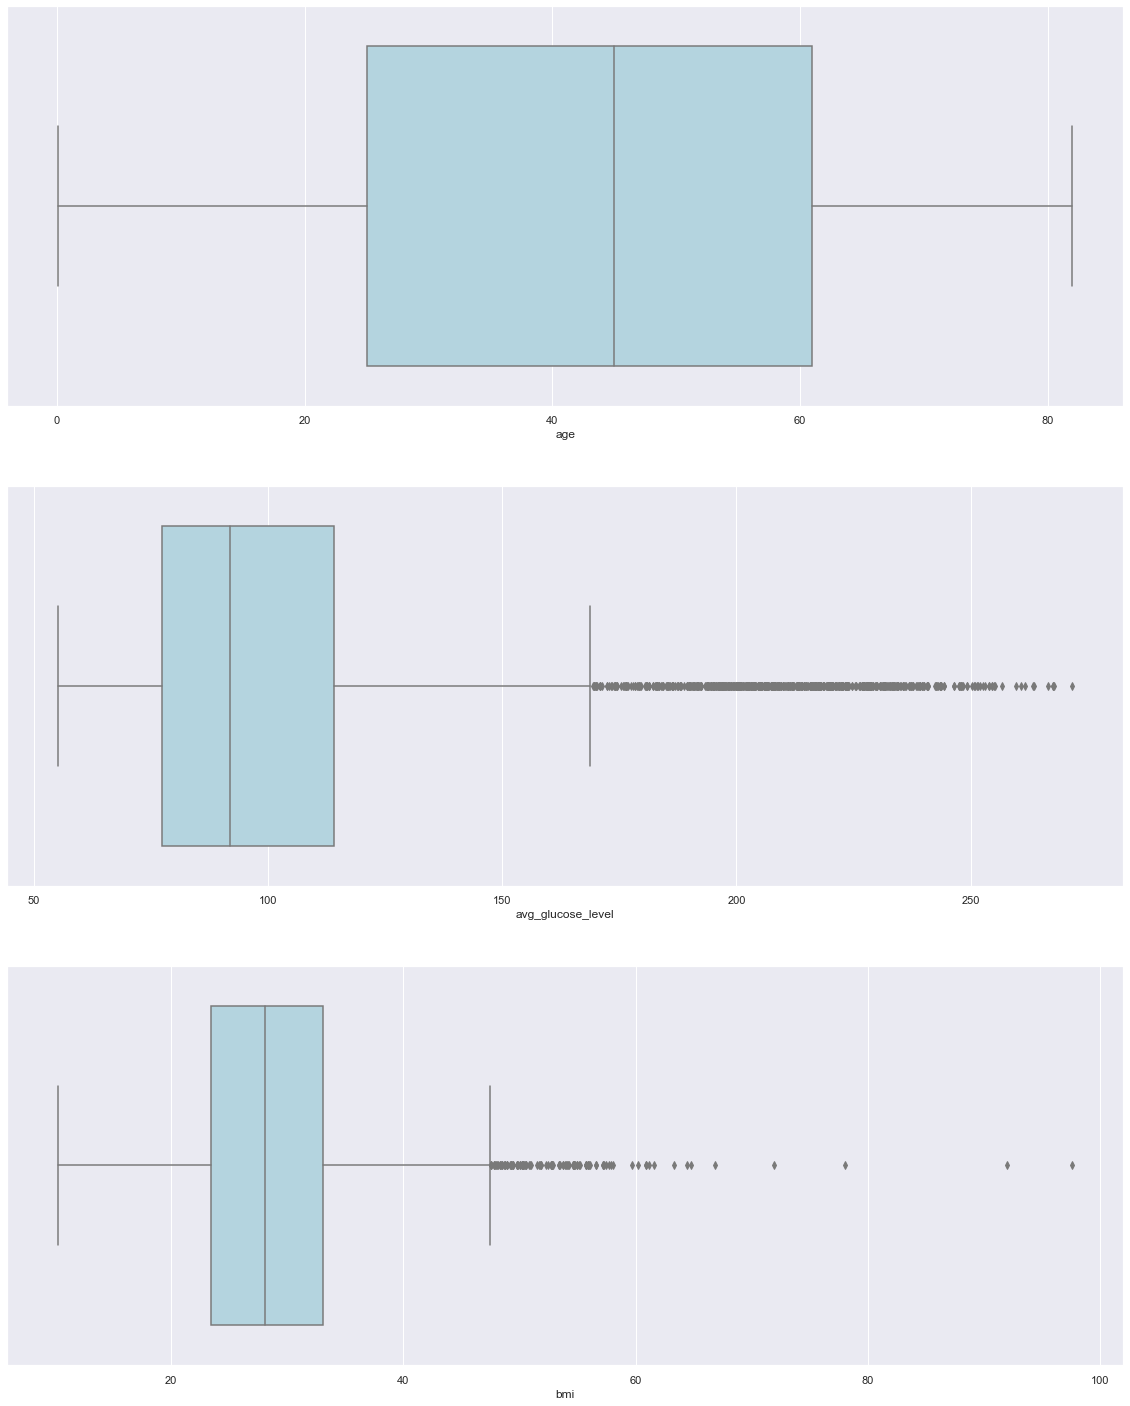

In [121]:
ig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 25))
for idx, feature in enumerate(interval_cols):
    sns.boxplot(x=data[feature], color='lightblue', ax=axes[idx])

### distribution

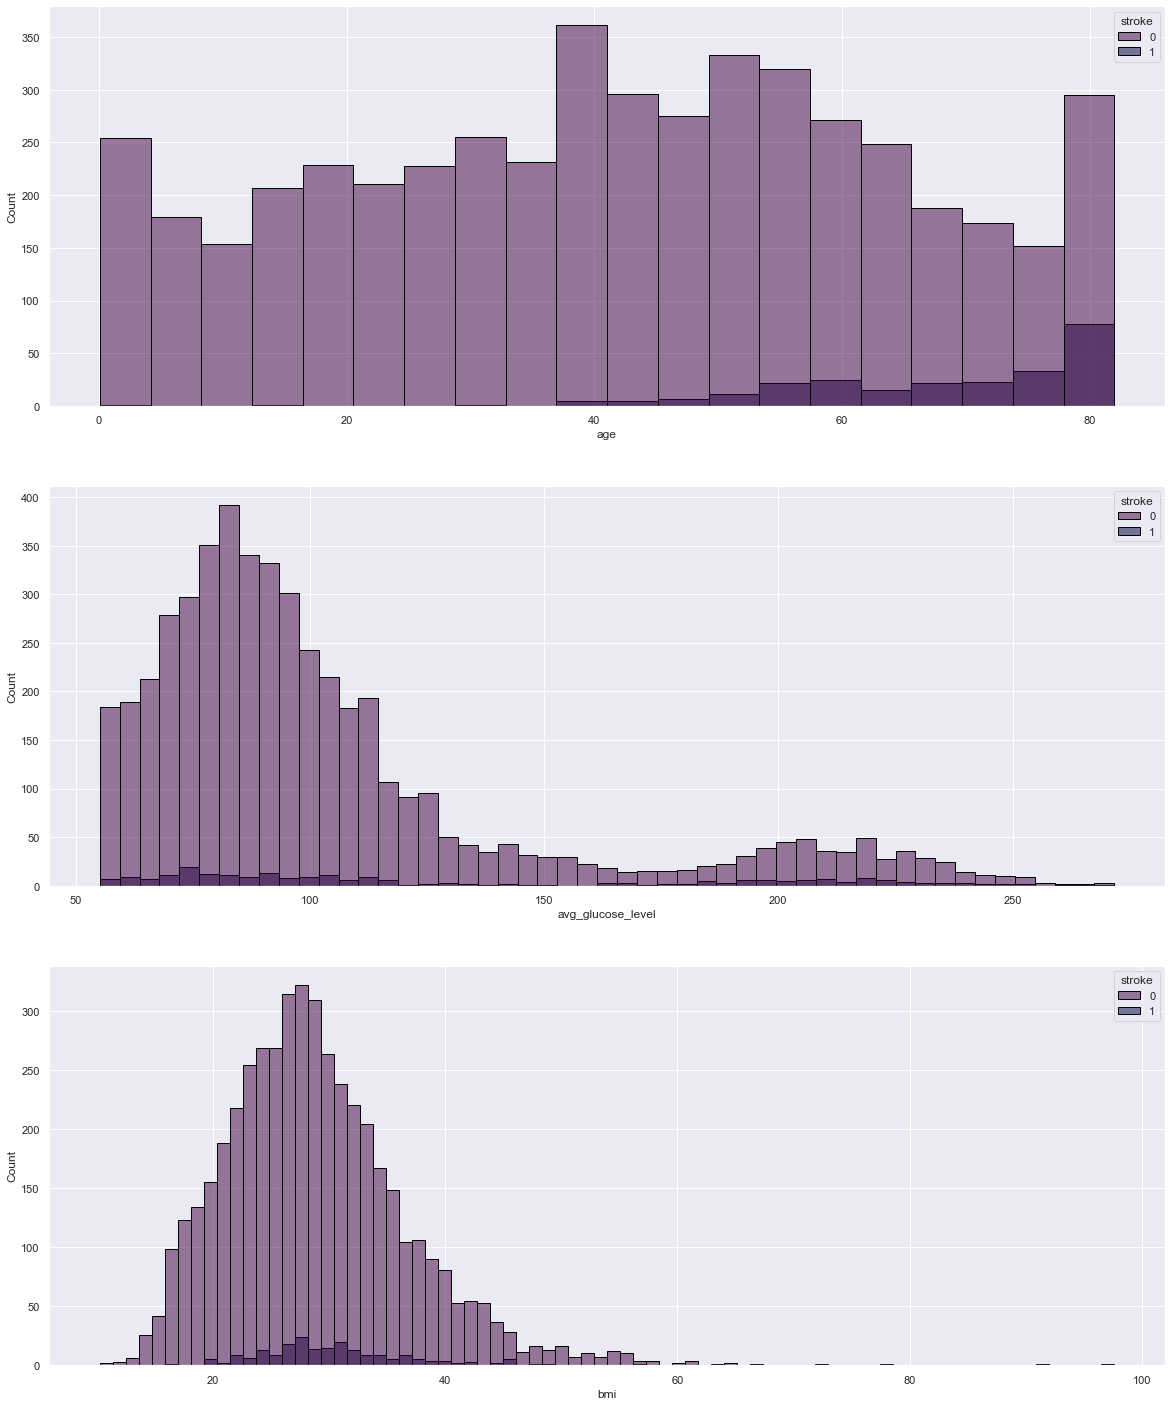

In [151]:
ig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 25))
for idx, feature in enumerate(interval_cols):
    sns.histplot(x=data[feature], hue=data['stroke'], 
                palette=[(0.255,0,0.255), (0,0, 0.255)],
                edgecolor='black', ax=axes[idx])